# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Loan_Prediction.csv")
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
484,LP002543,Male,Yes,2,Graduate,No,8333,0.0,246.0,360.0,1.0,Semiurban,Y
367,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y


# Data Cleaning

## 1. Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.duplicated().sum()

np.int64(0)

#### Notes
- `Dependents` column contains nulls which may be replaced with 0 and needs to be converted to float
- Almost every row contains small amount of nulls
- The boolean columns `Married`, `Self_Employed`, and `Loan_Status` will be changed to 0 and 1

## 2. Solving data issues

### Working with `Dependents` column

In [6]:
# Replacing the nulls with 0
df["Dependents"] = df["Dependents"].fillna(0)

In [7]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

> The "3+" will be converted to 3 and the whole column will be converted to integer

In [8]:
df["Dependents"] = df["Dependents"].apply(lambda x: int(x.strip('+')) if isinstance(x, str) else x)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df["Dependents"].unique()

array([0, 1, 2, 3])

In [10]:
df["Dependents"].isna().sum()

np.int64(0)

### Handeling missing values

- since every column has small amount of nulls then replacing or dropping them wouldn't affect a lot but i will avoid dropping them since the data is kind of small
- The null values in categorial columns will be replaced with mode
- The null values in numerical columns will be replaced with median since it is safer than mean as it doesn't get affected by outliers

In [11]:
# Defining numerical and categorial columns
num_cols = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed","Credit_History", "Property_Area", "Loan_Status"]   # Although Cridit_History is int it was added to categorial since it can only contain 1 or 0

In [12]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### Converting Yes or No column with 0, 1

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
def normalize_bool_col(col):
    df[col] = df[col].str.strip().replace({
        "Yes": 1,
        'Y': 1,
        "No": 0,
        "N": 0
    })

In [16]:
normalize_bool_col("Married")
normalize_bool_col("Self_Employed")
normalize_bool_col("Loan_Status")

In [17]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
114,LP001398,Male,0,0,Graduate,0,5050,0.0,118.0,360.0,1.0,Semiurban,1
532,LP002723,Male,0,2,Graduate,0,3588,0.0,110.0,360.0,0.0,Rural,0
545,LP002767,Male,1,0,Graduate,0,2768,1950.0,155.0,360.0,1.0,Rural,1
221,LP001743,Male,1,2,Graduate,0,4009,1717.0,116.0,360.0,1.0,Semiurban,1
402,LP002297,Male,0,0,Graduate,0,2500,20000.0,103.0,360.0,1.0,Semiurban,1
222,LP001744,Male,0,0,Graduate,0,2971,2791.0,144.0,360.0,1.0,Semiurban,1
366,LP002187,Male,0,0,Graduate,0,2500,0.0,96.0,480.0,1.0,Semiurban,0
609,LP002978,Female,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,1
266,LP001877,Male,1,2,Graduate,0,4708,1387.0,150.0,360.0,1.0,Semiurban,1
171,LP001585,Male,1,3,Graduate,0,51763,0.0,700.0,300.0,1.0,Urban,1


# Encoding Categorical Columns

### The categorial columns will be encoded using one hot encoder

In [18]:
df_encoded = pd.get_dummies(df, columns=['Gender', "Education", "Property_Area"], drop_first=False)
df_encoded

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,False,False,True
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,True,False,True,False,False
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,True,True,False,False,False,True
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,False,True
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False
610,LP002979,1,3,0,4106,0.0,40.0,180.0,1.0,1,False,True,True,False,True,False,False
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True,True,False,False,False,True
612,LP002984,1,2,0,7583,0.0,187.0,360.0,1.0,1,False,True,True,False,False,False,True


> Converting the new encoded columns to integer

In [19]:
cols = ["Gender_Female", "Gender_Male", "Education_Graduate", "Education_Not Graduate", "Property_Area_Rural", "Property_Area_Semiurban", "Property_Area_Urban"]
df_encoded[cols] = df_encoded[cols].apply(lambda x: x.astype(int))
df_encoded.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


# Train-Test split

> First i will drop `Loan_ID` since it will be useless

In [20]:
df_encoded = df_encoded.drop("Loan_ID", axis=1)
df_encoded.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1
3,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


## 1. Splitting the dataset

In [21]:
x = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## 2. Feature scaling

### All numeric columns will be scaled using standard scaler (except the boolean columns)

In [22]:
scaler = StandardScaler()

x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])


In [23]:
x_train.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
154,0,0,0,3254,0.0,50.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,-0.774176,1.425084
239,1,1,0,3315,0.0,96.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,1.291696,-0.701713
448,1,2,0,3340,1710.0,150.0,360.0,0.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
471,1,1,0,2653,1500.0,113.0,180.0,0.0,-0.464054,0.464054,-1.850250,1.850250,1.544735,-0.774176,-0.701713
273,1,0,0,2620,2223.0,150.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,-0.647360,1.291696,-0.701713


In [24]:
x_test.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
150,0,0,0,6277,0.0,118.0,360.0,0.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
559,1,0,0,4180,2306.0,182.0,360.0,1.0,2.154920,-2.154920,0.540468,-0.540468,-0.647360,1.291696,-0.701713
598,1,0,1,9963,0.0,180.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
235,1,1,0,5500,1260.0,170.0,360.0,1.0,-0.464054,0.464054,0.540468,-0.540468,1.544735,-0.774176,-0.701713
145,1,0,0,2330,4486.0,100.0,360.0,1.0,2.154920,-2.154920,0.540468,-0.540468,-0.647360,1.291696,-0.701713


# Modeling

## 1. Logestic Regression without GridSearchCV

In [25]:
# A function to evaluate the train and test accuracy
def accuracy(model, X_train, y_train, X_test, y_test):

    # Train accuracy
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    # Test accuracy
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


In [26]:
def get_classification_report(model, X_train, y_train, X_test, y_test):

    results = {}
    
    # Classification Report for Train
    y_pred_train = model.predict(X_train)
    results["Train Classification Report"] = classification_report(y_train, y_pred_train)
    
    # Classification Report for Test
    y_pred_test = model.predict(X_test)
    results["Test Classification Report"] = classification_report(y_test, y_pred_test)
    
    return results

### Model training with L1

In [27]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(x_train, y_train)
y_pred_l1 = model_l1.predict(x_test)

In [28]:
accuracy(model_l1, x_train, y_train, x_test, y_test)

Train Accuracy: 0.8004073319755601, Test Accuracy: 0.8617886178861789


### Model training with L2

In [29]:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(x_train, y_train)
y_pred_l2 = model_l2.predict(x_test)

In [30]:
accuracy(model_l2, x_train, y_train, x_test, y_test)

Train Accuracy: 0.7739307535641547, Test Accuracy: 0.7967479674796748


### models Evaluation

In [31]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f" {model_name} Evaluation:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("")


In [32]:

evaluate_model(y_test, y_pred_l1, "Logistic Regression (L1)")
evaluate_model(y_test, y_pred_l2, "Logistic Regression (L2)")

 Logistic Regression (L1) Evaluation:
Accuracy : 0.8618
Precision: 0.8400
Recall   : 0.9882
F1 Score : 0.9081

 Logistic Regression (L2) Evaluation:
Accuracy : 0.7967
Precision: 0.7941
Recall   : 0.9529
F1 Score : 0.8663



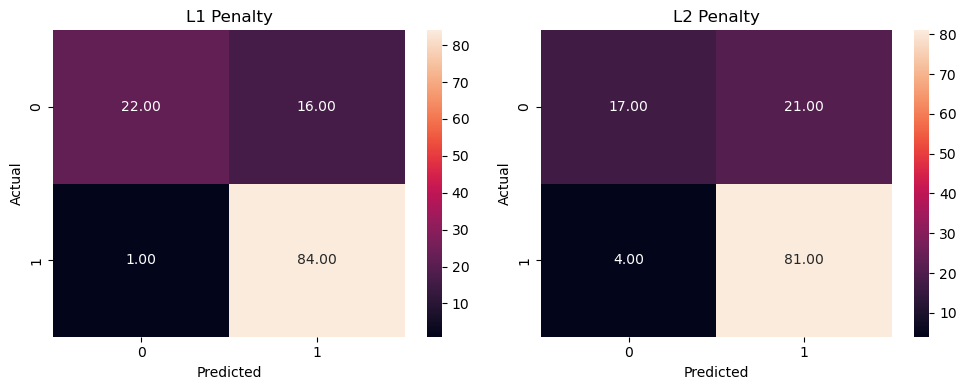

In [33]:
cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_l2 = confusion_matrix(y_test, y_pred_l2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_l1, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("L1 Penalty")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_l2, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("L2 Penalty")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


L1 Logistic Regression AUC: 0.8619
L2 Logistic Regression AUC: 0.8331


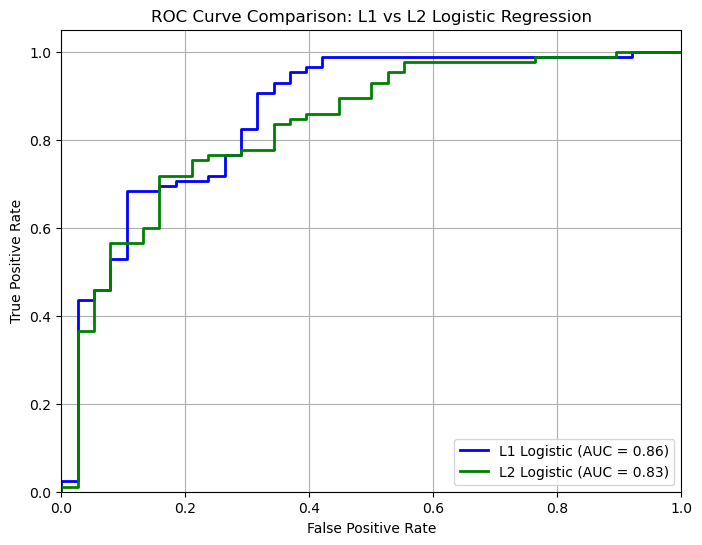

In [34]:
# ROC and AUC Score

y_prob_l1 = model_l1.predict_proba(x_test)[:, 1]
y_prob_l2 = model_l2.predict_proba(x_test)[:, 1]

fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2)

# Calcualating AUC
auc_l1 = roc_auc_score(y_test, y_prob_l1)
auc_l2 = roc_auc_score(y_test, y_prob_l2)

print(f"L1 Logistic Regression AUC: {auc_l1:.4f}")
print(f"L2 Logistic Regression AUC: {auc_l2:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'L1 Logistic (AUC = {auc_l1:.2f})')
plt.plot(fpr_l2, tpr_l2, color='green', lw=2, label=f'L2 Logistic (AUC = {auc_l2:.2f})')


plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: L1 vs L2 Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Logestic Regression with GridSearchCV

In [35]:
model_grid = LogisticRegression()

param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.013, 0.02, 0.03, 0.05, 0.06, 0.07],
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "l1_ratio": [0, 0.5, 1]
}

grid_search = GridSearchCV(
    estimator=model_grid,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'C': 0.06, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.8684492604059167


In [36]:
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(x_test)
y_prob_grid = best_model.predict_proba(x_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))


Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1 Score: 0.9081081081081082


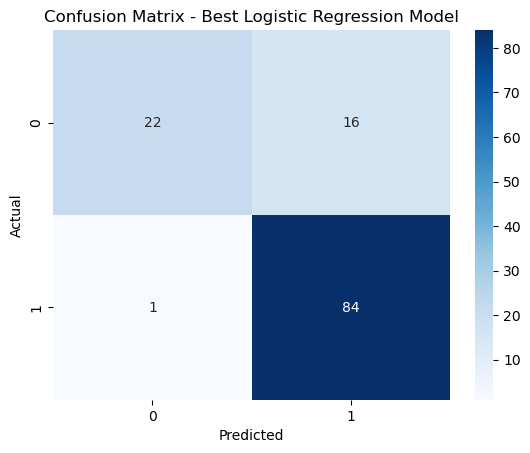

In [37]:
cm = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Logistic Regression Model")
plt.show()


## 2. Cart Decision Tree

### Without GridSearchCV

In [38]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
accuracy(model_dt, x_train, y_train, x_test, y_test)

Train Accuracy: 1.0, Test Accuracy: 0.7723577235772358


> The model has overfitting so we will try it again with GridSearchCV and see the difference

### With GridSearchCV

In [40]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

model_dt_grid = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model_dt_grid,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)


best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'}
Best CV Score: 0.8004122861265719


In [41]:
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'}
Best CV Score: 0.8004122861265719


In [42]:
best_dt_grid = grid_search.best_estimator_

accuracy(best_dt_grid, x_train, y_train, x_test, y_test)

Train Accuracy: 0.7983706720977597, Test Accuracy: 0.8536585365853658


In [43]:
report_results = get_classification_report(best_dt, x_train, y_train, x_test, y_test)

print("Train Classification Report:")
print(report_results["Train Classification Report"])
print("-"*50)

print("Test Classification Report:")
print(report_results["Test Classification Report"])


Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491

--------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [44]:
y_pred_dt = model_dt.predict(x_test)
y_prob_dt = model_dt.predict_proba(x_test)[:,1]

y_pred_dt_grid = best_dt_grid.predict(x_test)
y_prob_dt_grid = best_dt_grid.predict_proba(x_test)[:,1]



# Comparing Models

In [45]:
# Saving the results in a dataframe to plot it
results = [
    {
        "Model": "L1 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l1),
        "Precision": precision_score(y_test, y_pred_l1),
        "Recall": recall_score(y_test, y_pred_l1),
        "F1 Score": f1_score(y_test, y_pred_l1),
        "AUC": roc_auc_score(y_test, y_prob_l1)
    },
    {
        "Model": "L2 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l2),
        "Precision": precision_score(y_test, y_pred_l2),
        "Recall": recall_score(y_test, y_pred_l2),
        "F1 Score": f1_score(y_test, y_pred_l2),
        "AUC": roc_auc_score(y_test, y_prob_l2)
    },
    {
        "Model": "GridSearch Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid),
        "Recall": recall_score(y_test, y_pred_grid),
        "F1 Score": f1_score(y_test, y_pred_grid),
        "AUC": roc_auc_score(y_test, y_prob_grid)
    },
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1 Score": f1_score(y_test, y_pred_dt),
        "AUC": roc_auc_score(y_test, y_prob_dt)
    },
    {
        "Model": "GridSearch Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt_grid),
        "Precision": precision_score(y_test, y_pred_dt_grid),
        "Recall": recall_score(y_test, y_pred_dt_grid),
        "F1 Score": f1_score(y_test, y_pred_dt_grid),
        "AUC": roc_auc_score(y_test, y_prob_dt_grid)
    }
]

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

#### Static version for GitHub

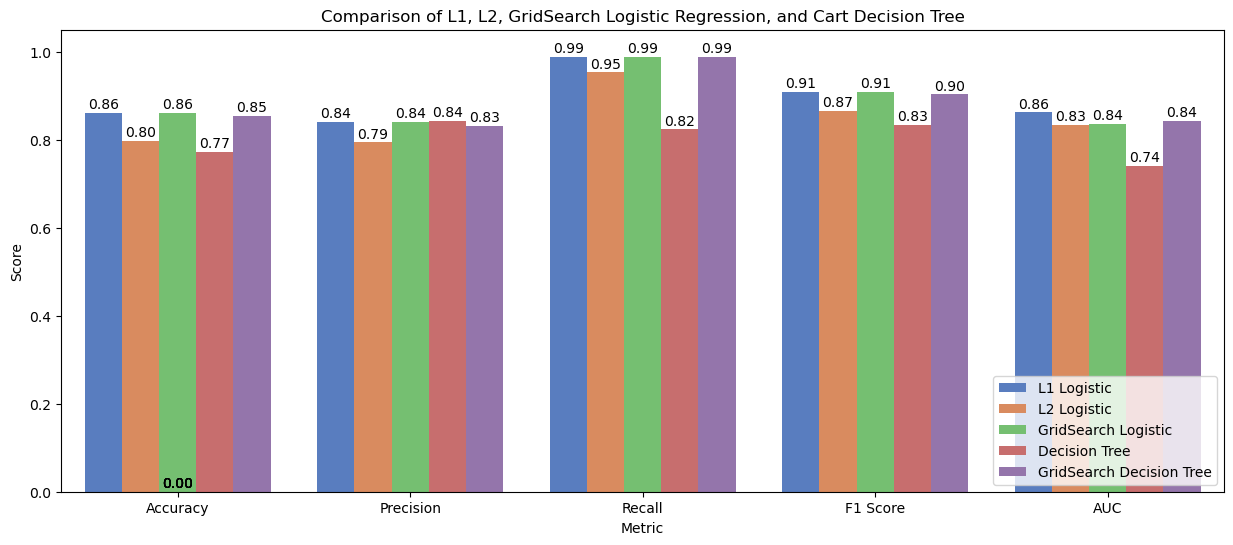

In [46]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="muted")

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 0.01, s=f'{height:.2f}', ha='center')

plt.title("Comparison of L1, L2, GridSearch Logistic Regression, and Cart Decision Tree")
plt.ylim(0,1.05)
plt.legend(loc='lower right')
plt.show()


### Interactive version for better visualization

In [47]:
import plotly.express as px

fig = px.bar(df_melted, x="Metric", y="Score", color="Model", barmode="group",
            title="Comparison of L1, L2, and GridSearch Logistic Regression",
            text="Score", height=500)

fig.update_layout(yaxis=dict(range=[0,1.05]))
fig.show()
